In [1]:
# 대신증권 연결 확인
import win32com.client

instCpCybos = win32com.client.Dispatch("CpUtil.CpCybos")
print(instCpCybos.IsConnect)

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.4f}'.format

1


In [2]:
# 분 차트 받아오기
def get_min(code,time,j):  # 종목, 기간, 오늘, 시점, 분, 시간간격
    today = datetime.today().strftime("%Y%m%d") 
    start = (datetime.today() - timedelta(j)).strftime("%Y%m%d") 
    print(start, today)
    instStockChart = win32com.client.Dispatch("CpSysDib.StockChart")
    instStockChart.SetInputValue(0, code )
    instStockChart.SetInputValue(1, ord('1'))
    instStockChart.SetInputValue(2, today)
    instStockChart.SetInputValue(3, start)
    # instStockChart.SetInputValue(4, 1000)
    instStockChart.SetInputValue(5, (0,1,5))
    instStockChart.SetInputValue(6, ord('m'))  # 'm' : 분, 'T' : 틱
    instStockChart.SetInputValue(7, time)      # 데이터 주기
    instStockChart.SetInputValue(9, ord('1'))
    instStockChart.SetInputValue(10, 3)

    instStockChart.BlockRequest()

    numData = instStockChart.GetHeaderValue(3)
    numField = instStockChart.GetHeaderValue(1) 

    temp = {}
    for i in range(numData):
        temp[str(instStockChart.GetDataValue(0, i)) +'.'+ str(instStockChart.GetDataValue(1, i))] = [instStockChart.GetDataValue(2, i)]
    temp = pd.DataFrame(temp).transpose()
    temp.index.names = ['time']
    return temp

# KODEX200~ KODEX_active 공적분 분석

In [71]:
for i in [1]: # 분봉 간격
    for j in [100]: # 일 간격
        kodex200 = get_min('A069500',i,j)
        kodex_active = get_min('A364690',i,j)
#         kodex_active = get_min('A365040',i,j)
        temp =  pd.merge(left = kodex200 , right = kodex_active, how = "inner", on = "time")
        temp.columns = ['kodex200','kodex_active']
        score, pvalue, _ = coint(temp['kodex200'],temp['kodex_active'])
        print('minute : ',i,' , ','time interval : ',j,' , ','Cointegration test p-value: ' + str(pvalue))
        print(temp.corr(method='pearson'))
temp = temp[::-1]
temp['spread'] = temp['kodex200'] - temp['kodex_active']*3
# temp['kodex200_dayret'] = temp['kodex200'].iloc[:-1]/temp['kodex200'].iloc[1:]
# temp['kodex_active_dayret'] = temp['kodex_active']/temp['kodex_active'][0]
temp['kodex200_ret'] = np.log(temp['kodex200']/temp['kodex200'][0])
temp['kodex_active_ret'] = np.log(temp['kodex_active']/temp['kodex_active'][0])
temp['ret_spread'] = temp['kodex_active_ret'] - temp['kodex200_ret']
temp

20200918 20201227
20200918 20201227
minute :  1  ,  time interval :  100  ,  Cointegration test p-value: 0.10190549841275809
              kodex200  kodex_active
kodex200        1.0000        0.9866
kodex_active    0.9866        1.0000


,kodex200,kodex_active,spread,kodex200_ret,kodex_active_ret,ret_spread
time,,,,,,
20201130.1218,35035,11140,1615,0.0000,0.0000,0.0000
20201130.1222,35020,11155,1555,-0.0004,0.0013,0.0018
20201130.1223,35020,11155,1555,-0.0004,0.0013,0.0018
20201130.1224,35020,11150,1570,-0.0004,0.0009,0.0013
20201130.1225,35015,11145,1580,-0.0006,0.0004,0.0010
20201130.1226,35010,11145,1575,-0.0007,0.0004,0.0012
20201130.1227,34995,11145,1560,-0.0011,0.0004,0.0016
20201130.1228,34990,11140,1570,-0.0013,0.0000,0.0013
20201130.1229,34985,11135,1580,-0.0014,-0.0004,0.0010


#  kodex - kosdaq 비교

In [3]:
for i in [1]: # 분봉 간격
    for j in [100]: # 일 간격
        kodex200 = get_min('A069500',i,j)
        kodex_active = get_min('A364690',i,j)
#         kodex_active = get_min('A365040',i,j)
        temp =  pd.merge(left = kodex200 , right = kodex_active, how = "inner", on = "time")
        temp.columns = ['kodex200','kodex_active']
        score, pvalue, _ = coint(temp['kodex200'],temp['kodex_active'])
        print('minute : ',i,' , ','time interval : ',j,' , ','Cointegration test p-value: ' + str(pvalue))
        print(temp.corr(method='pearson'))
temp = temp[::-1]

20200918 20201227
20200918 20201227
minute :  1  ,  time interval :  100  ,  Cointegration test p-value: 0.10190549841273416
              kodex200  kodex_active
kodex200        1.0000        0.9866
kodex_active    0.9866        1.0000


In [4]:
df = temp
df['spread'] = df['kodex200'] - df['kodex_active']*3

df['kodex200_ret'] = np.log(df['kodex200']/df['kodex200'][0])*2
df['kodex_active_ret'] = np.log(df['kodex_active']/df['kodex_active'][0])
df['ret_spread'] = df['kodex_active_ret'] - df['kodex200_ret']
df

,kodex200,kodex_active,spread,kodex200_ret,kodex_active_ret,ret_spread
time,,,,,,
20201130.1218,35035,11140,1615,0.0000,0.0000,0.0000
20201130.1222,35020,11155,1555,-0.0009,0.0013,0.0022
20201130.1223,35020,11155,1555,-0.0009,0.0013,0.0022
20201130.1224,35020,11150,1570,-0.0009,0.0009,0.0018
20201130.1225,35015,11145,1580,-0.0011,0.0004,0.0016
20201130.1226,35010,11145,1575,-0.0014,0.0004,0.0019
20201130.1227,34995,11145,1560,-0.0023,0.0004,0.0027
20201130.1228,34990,11140,1570,-0.0026,0.0000,0.0026
20201130.1229,34985,11135,1580,-0.0029,-0.0004,0.0024


In [98]:
i = 0
for j in range(len(df)):
    if round(df['kodex_active_ret'].iloc[j],4) == round(df['kodex200_ret'].iloc[j],4) :
        i+=1
i

33

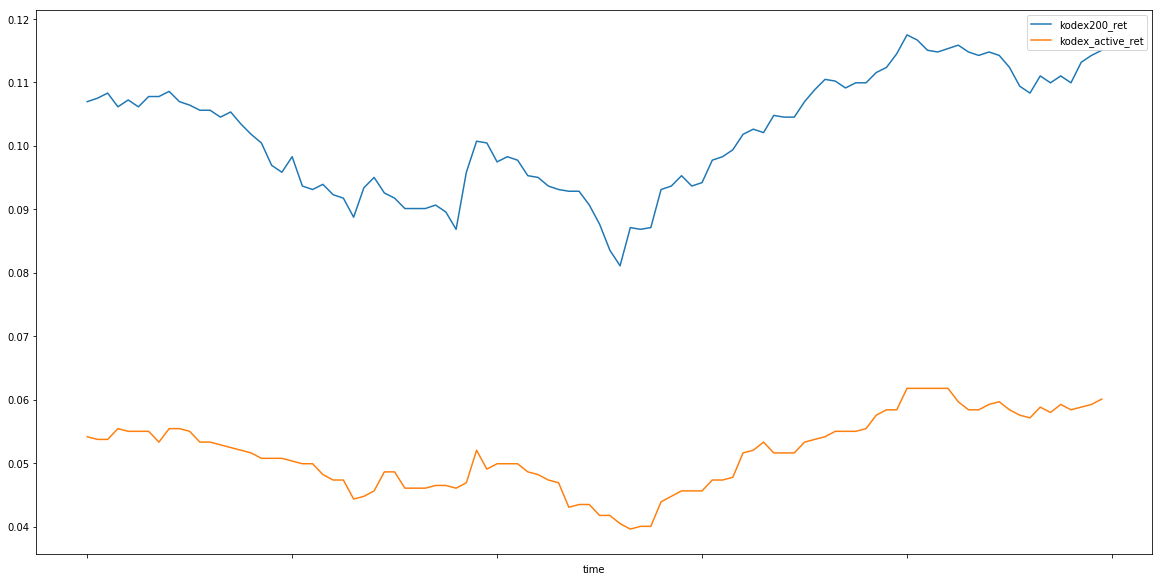

In [7]:
plt.rcParams["figure.figsize"] = (20, 10)
temp[['kodex200_ret','kodex_active_ret']].iloc[-100:].plot()
# temp['ret_spread'].hist()